# Importing Libraries & Datasets

In [ ]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns

In [ ]:
insilico_favorable = pd.read_csv("Go insilico favorable.csv")
insilico_unfavorable = pd.read_csv("Go insilico unfavorable.csv")
clinical_favorable = pd.read_csv("Go clinical favorable.csv")
clinical_unfavorable = pd.read_csv("Go clinical unfavorable.csv")
zebrafish_favorable = pd.read_csv("GO zebrafish favorable.csv")
zebrafish_unfavorable = pd.read_csv("GO zebrafish unfavorable.csv")

# All Dataset Analysis

In [ ]:
# Extract unique terms from each DataFrame
terms_sets = []
for df in [insilico_favorable, insilico_unfavorable, clinical_favorable, clinical_unfavorable, zebrafish_favorable, zebrafish_unfavorable]:
    terms_sets.append(set(df['Term']))

# Find the common terms
common_terms = set.intersection(*terms_sets)

print("Common terms among all datasets:")
for term in common_terms:
    print(term)

Common terms among all datasets:
Protein Kinase Binding (GO:0019901)
Adenyl Ribonucleotide Binding (GO:0032559)
Heme Binding (GO:0020037)
G Protein-Coupled Receptor Activity (GO:0004930)


# Favorable Terms

In [ ]:
# Step 1: Set 'Term' as the index and select the relevant columns
insilico_data = insilico_favorable.set_index('Term')[['Adjusted P-value', 'Genes']]
invivo_data = zebrafish_favorable.set_index('Term')[['Adjusted P-value', 'Genes']]
clinical_data = clinical_favorable.set_index('Term')[['Adjusted P-value', 'Genes']]

# Step 2: Find common GO enrichment terms
common_terms = set(insilico_data.index).intersection(invivo_data.index, clinical_data.index)

# Step 3: Filter DataFrames to include only common terms
insilico_common = insilico_data.loc[common_terms]
invivo_common = invivo_data.loc[common_terms]
clinical_common = clinical_data.loc[common_terms]

# Step 4: Merge the DataFrames on the common terms
merged_df = pd.concat([
    insilico_common.add_suffix('_insilico'),
    invivo_common.add_suffix('_invivo'),
    clinical_common.add_suffix('_clinical')
], axis=1)

# Step 5: Reset the index for readability
merged_df.reset_index(inplace=True)

# Display the resulting DataFrame
merged_df = pd.DataFrame(merged_df)
merged_df


,Term,Adjusted P-value_insilico,Genes_insilico,Adjusted P-value_invivo,Genes_invivo,Adjusted P-value_clinical,Genes_clinical
0,Steroid Hydroxylase Activity (GO:0008395),0.026257,CYP11A1;CYP1A1,0.035157,CYP27A1;CYP11B2,0.000004,CYP2C9;CYP1A2;CYP1A1;CYP2C19
1,Purine Ribonucleoside Triphosphate Binding (GO...,0.113348,GNA14;GNA15;KCNJ11;GNA11;GNAQ,0.908447,KCNJ11,0.350685,ABCB1;GNAT2
2,Heme Binding (GO:0020037),0.116201,CYP11A1;NR1D1,0.131570,CYP27A1;CYP11B2,0.000435,CYP2C9;CYP1A2;CYP2E1;CYP2C19
3,ATP Binding (GO:0005524),0.732862,KCNJ11,0.778924,KCNJ11,0.501721,ABCB1
4,G Protein-Coupled Receptor Activity (GO:0004930),0.148546,P2RY12;GNRHR2;HTR1E,0.387164,ADORA3;DRD1,0.001597,TAS2R60;OPRD1;GNAT2;HTR1E;OPRM1
5,Voltage-Gated Calcium Channel Activity (GO:000...,0.242664,SCN5A,0.016692,SCN10A;SCN5A;SCN2A,0.143191,OPRM1
6,Protein Kinase Binding (GO:0019901),0.693422,SCN5A;ESR1,0.741330,SCN5A;ADRA2A,0.382072,CRK;ADRA2A
7,Ribonucleoside Triphosphate Phosphatase Activi...,0.028032,GNAZ;GNA14;GNA15;GNA11;GNAQ,0.770630,GNAZ,0.062571,GNAO1;GNAZ;GNAT2
8,Guanyl-Nucleotide Exchange Factor Activity (GO...,0.634921,P2RY12,0.317650,TBXA2R;SLC6A2,0.422296,SLC6A2
9,Sodium:Chloride Symporter Activity (GO:0015378),0.014073,SLC6A3;SLC18A2,0.001067,SLC6A2;SLC6A3;SLC6A4,0.002261,SLC6A2;SLC6A4


In [ ]:
# Save merged_df to a CSV file
merged_df.to_csv('common_favorable_go_enrichment_terms.csv', index=False)

In [ ]:
# Filter merged_df to include only rows where at least one p-value is below 0.05
filtered_df = merged_df[
    (merged_df['Adjusted P-value_insilico'] < 0.05) |
    (merged_df['Adjusted P-value_invivo'] < 0.05) |
    (merged_df['Adjusted P-value_clinical'] < 0.05)
]

# Display the filtered DataFrame
filtered_df = pd.DataFrame(filtered_df)
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.to_csv('common_significant_favorable_go_terms.csv', index=False)

In [ ]:
# Filter terms with at least one P-value less than 0.05
significant_terms = []
for term in common_terms:
    if insilico_data.get(term, float('inf')) < 0.05 or \
       clinical_data.get(term, float('inf')) < 0.05 or \
       invivo_data.get(term, float('inf')) < 0.05:
        significant_terms.append(term)

num_significant_terms = len(significant_terms)
print(str(num_significant_terms) + " terms common to all datasets")

print("Terms common to all datasets with at least one P-value less than 0.05:")
for term in significant_terms:
    print("Term:", term)
    print("P-value (insilico):", insilico_data.get(term, "N/A"))
    print("P-value (clinical):", clinical_data.get(term, "N/A"))
    print("P-value (zebrafish):", invivo_data.get(term, "N/A"))
    print()  # Adding a blank line for readability

0 terms common to all datasets
Terms common to all datasets with at least one P-value less than 0.05:


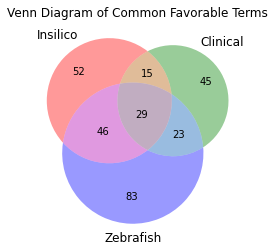

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Extract unique terms from each DataFrame
insilico_terms = set(insilico_favorable['Term'])
clinical_terms = set(clinical_favorable['Term'])
zebrafish_terms = set(zebrafish_favorable['Term'])

# Create the Venn diagram
venn3(subsets=(len(insilico_terms - clinical_terms - zebrafish_terms),  # insilico only
               len(clinical_terms - insilico_terms - zebrafish_terms),  # clinical only
               len(insilico_terms & clinical_terms - zebrafish_terms),  # insilico and clinical
               len(zebrafish_terms - insilico_terms - clinical_terms),  # zebrafish only
               len(insilico_terms & zebrafish_terms - clinical_terms),  # insilico and zebrafish
               len(clinical_terms & zebrafish_terms - insilico_terms),  # clinical and zebrafish
               len(insilico_terms & clinical_terms & zebrafish_terms)),  # common to all
      set_labels=('Insilico', 'Clinical', 'Zebrafish'))



# Display the plot
plt.title("Venn Diagram of Common Favorable Terms")
plt.savefig("figure5c_sharedGO_favorable.png",format="png",dpi=300)

# Unfavorable Terms

In [ ]:
# Step 1: Set 'Term' as the index and select the relevant columns
insilico_data = insilico_unfavorable.set_index('Term')[['Adjusted P-value', 'Genes']]
invivo_data = zebrafish_unfavorable.set_index('Term')[['Adjusted P-value', 'Genes']]
clinical_data = clinical_unfavorable.set_index('Term')[['Adjusted P-value', 'Genes']]

# Step 2: Find common GO enrichment terms
common_terms = set(insilico_data.index).intersection(invivo_data.index, clinical_data.index)

# Step 3: Filter DataFrames to include only common terms
insilico_common = insilico_data.loc[common_terms]
invivo_common = invivo_data.loc[common_terms]
clinical_common = clinical_data.loc[common_terms]

# Step 4: Merge the DataFrames on the common terms
merged_df = pd.concat([
    insilico_common.add_suffix('_insilico'),
    invivo_common.add_suffix('_invivo'),
    clinical_common.add_suffix('_clinical')
], axis=1)

# Step 5: Reset the index for readability
merged_df.reset_index(inplace=True)

# Display the resulting DataFrame
merged_df = pd.DataFrame(merged_df)
# Save merged_df to a CSV file
merged_df.to_csv('common_unfavorable_go_enrichment_terms.csv', index=False)



In [ ]:
# Filter merged_df to include only rows where at least one p-value is below 0.05
filtered_df = merged_df[
    (merged_df['Adjusted P-value_insilico'] < 0.05) |
    (merged_df['Adjusted P-value_invivo'] < 0.05) |
    (merged_df['Adjusted P-value_clinical'] < 0.05)
]

# Display the filtered DataFrame
filtered_df = pd.DataFrame(filtered_df)
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.to_csv('common_significant_unfavorable_go_terms.csv', index=False)

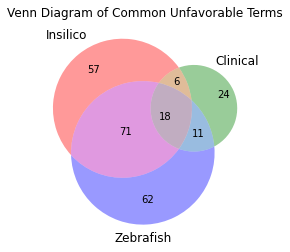

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
# Extract unique terms from each DataFrame
insilico_terms_2 = set(insilico_unfavorable['Term'])
clinical_terms_2 = set(clinical_unfavorable['Term'])
zebrafish_terms_2 = set(zebrafish_unfavorable['Term'])

# Create the Venn diagram
plt.figure()
venn3(subsets=(len(insilico_terms_2 - clinical_terms_2 - zebrafish_terms_2),  # insilico only
               len(clinical_terms_2 - insilico_terms_2 - zebrafish_terms_2),  # clinical only
               len(insilico_terms_2 & clinical_terms_2 - zebrafish_terms_2),  # insilico and clinical
               len(zebrafish_terms_2 - insilico_terms_2 - clinical_terms_2),  # zebrafish only
               len(insilico_terms_2 & zebrafish_terms_2 - clinical_terms_2),  # insilico and zebrafish
               len(clinical_terms_2 & zebrafish_terms_2 - insilico_terms_2),  # clinical and zebrafish
               len(insilico_terms_2 & clinical_terms_2 & zebrafish_terms_2)),  # common to all
      set_labels=('Insilico', 'Clinical', 'Zebrafish'))


# Display the plot
plt.title("Venn Diagram of Common Unfavorable Terms")
plt.savefig("figure5d_sharedGO_unfavorable.png",format="png",dpi=300)